In [39]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import LinearRegressionMultipleVariables as lr

In [40]:
df = pd.read_csv("C:\\Users\\pedro\\OneDrive\\Documentos\\CEFETMG\\2023.2\\Inteligência Computacional\\CI-Algorithms\\Linear Regression\\Multiple Variables\\data2.txt", sep=",")
df_aux = df.copy()
df.head()


,Tamanho,Quartos,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


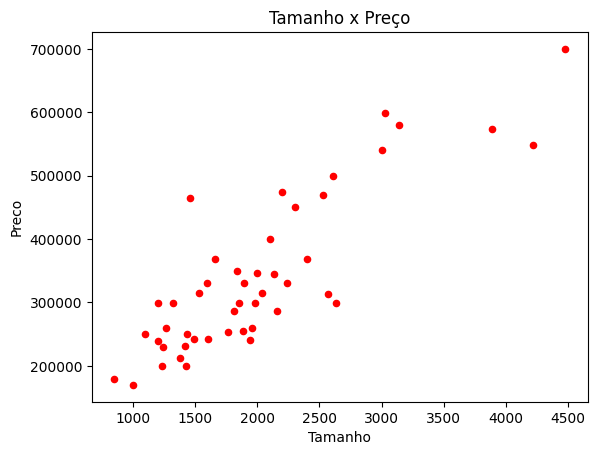

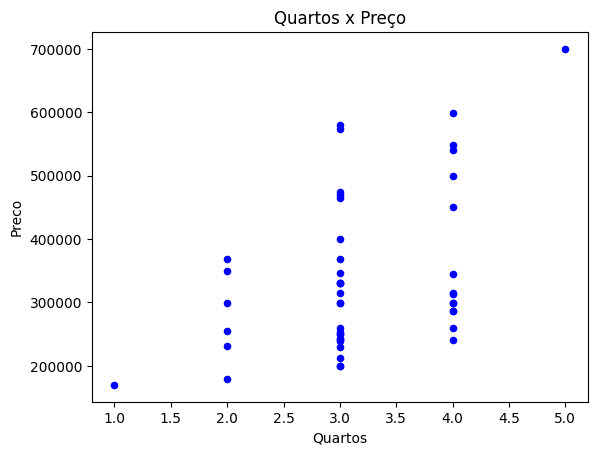

In [41]:
# Comparing each feature with the output value separately
df.plot(kind='scatter', x='Tamanho', y='Preco', c='Red', title='Tamanho x Preço')
df.plot(kind='scatter', x='Quartos', y='Preco', c='Blue', title='Quartos x Preço')
plt.show()

Normalização das Features

In [42]:
# Feature Normalization

# Subtracting the mean in the first feature (x1)
x1_mean = df['Tamanho'].mean()
new_x1_column = df['Tamanho'].copy()

for i in range (len(new_x1_column)):
    new_x1_column[i] = new_x1_column[i] - x1_mean

df['Tamanho'] = new_x1_column

# Subtracting the mean in the second feature (x2)
x2_mean = df['Quartos'].mean()
new_x2_column = df['Quartos'].copy()

for i in range (len(new_x2_column)):
    new_x2_column[i] = new_x2_column[i] - x2_mean

df['Quartos'] = new_x2_column

# Subtracting the mean in the output (y)
y_mean = df['Preco'].mean()
new_y_column = df['Preco'].copy()

for i in range (len(new_y_column)):
    new_y_column[i] = new_y_column[i] - y_mean

df['Preco'] = new_y_column

df.head()

,Tamanho,Quartos,Preco
0,103.319149,-0.170213,59487.340426
1,-400.680851,-0.170213,-10512.659574
2,399.319149,-0.170213,28587.340426
3,-584.680851,-1.170213,-108412.659574
4,999.319149,0.829787,199487.340426


In [43]:
# Dividing first feature values for the standard deviation
x1_std = df['Tamanho'].std()
new_x1_column = df['Tamanho'].copy()

for i in range (len(new_x1_column)):
    new_x1_column[i] = new_x1_column[i] / x1_std

df['Tamanho'] = new_x1_column

# Dividing the second feature values for the standard deviation
x2_std = df['Quartos'].std()
new_x2_column = df['Quartos'].copy()

for i in range (len(new_x2_column)):
    new_x2_column[i] = new_x2_column[i] / x2_std

df['Quartos'] = new_x2_column

# Dividing the output values for the standard deviation
y_std = df['Preco'].std()
new_y_column = df['Preco'].copy()

for i in range (len(new_y_column)):
    new_y_column[i] = new_y_column[i] / y_std

df['Preco'] = new_y_column

df.head()

,Tamanho,Quartos,Preco
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


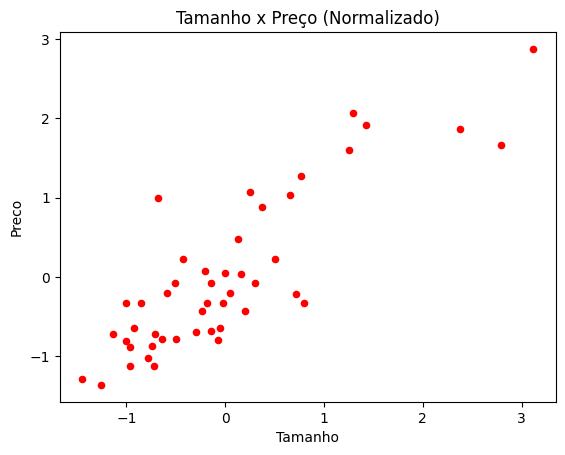

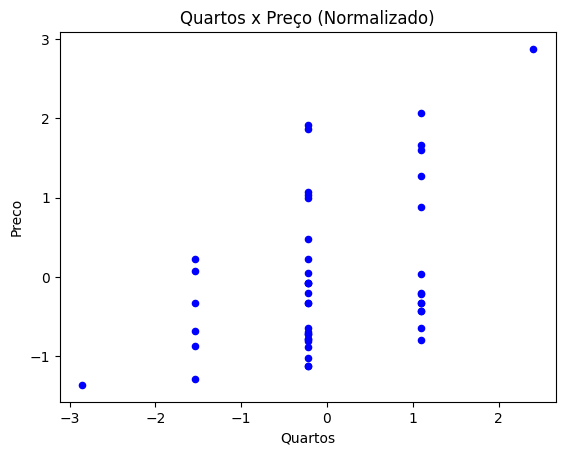

In [44]:
# Plotting features X output after normalization
df.plot(kind='scatter', x='Tamanho', y='Preco', c='Red', title='Tamanho x Preço (Normalizado)')
df.plot(kind='scatter', x='Quartos', y='Preco', c='Blue', title='Quartos x Preço (Normalizado)')
plt.show()

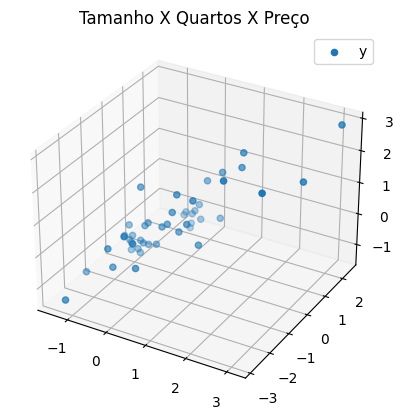

In [45]:
x1 = list(df['Tamanho'])
x2 = list(df['Quartos'])
y = list(df['Preco'])

# Plotting features X output in 3D after normalization
ax = plt.axes(projection = '3d')
ax.scatter(x1, x2, y, label = 'y')
ax.set_title('Tamanho X Quartos X Preço')
ax.legend()
plt.show()


Gradiente Descendente

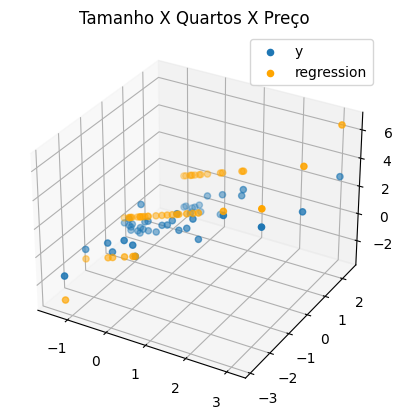

In [46]:
LinearRegression = []

# Defining b0 anda b1 initial values
initial_b0 = 1
initial_b1 = 1
initial_b2 = 1
b0 = initial_b0
b1 = initial_b1
b2 = initial_b2

# Generating First Linear Regression Prediction
for i in range (len(x1)):
    LinearRegression.append(lr.prediction(b0, b1, b2, x1[i], x2[i]))

# Plotting First Linear Regression Prediction
ax = plt.axes(projection = '3d')
ax.scatter(x1, x2, y, label = 'y')
ax.scatter(x1, x2, LinearRegression, label = 'regression', color = 'orange')
ax.set_title('Tamanho X Quartos X Preço')
ax.legend()
plt.show()


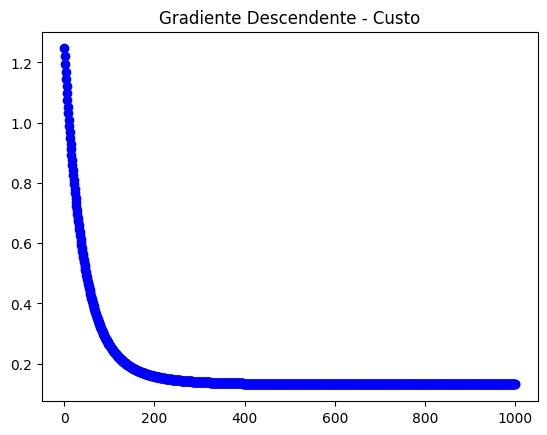

In [47]:
# Gradient Descent

CostValues = []
alpha = 0.01
epoch = 0

# Initializing b0, b1, b2
b0 = initial_b0
b1 = initial_b1
b2 = initial_b2

# Running the model for 1000 epochs
while epoch <= 1000:

    PredictionValues = []

    # Predict with the Linear Regression Model
    for i in range (len(x1)):
        PredictionValues.append(lr.prediction(b0, b1, b2, x1[i], x2[i]))
        
    # Calculate the cost of the prediction
    c = lr.cost(b0, b1, b2, x1, x2, y)
    CostValues.append(c)

    # Calculate b0, b1, b2 adjustments values
    b0_adjust = lr.adjust_b0(b0, b1, b2, x1, x2, y)
    b1_adjust = lr.adjust_b1(b0, b1, b2, x1, x2, y)
    b2_adjust = lr.adjust_b2(b0, b1, b2, x1, x2, y)

    # Update b0, b1, b2 values
    temp_b0 = b0 - alpha * b0_adjust
    temp_b1 = b1 - alpha * b1_adjust
    temp_b2 = b2 - alpha * b2_adjust
    b0 = temp_b0
    b1 = temp_b1
    b2 = temp_b2

    # Incrementing the epoch
    epoch = epoch + 1

# Plotting Cost
x_cost = range(0,1001)
t = list(x_cost)
plt.scatter(t, CostValues, color = 'Blue')
plt.title('Gradiente Descendente - Custo')
plt.show()

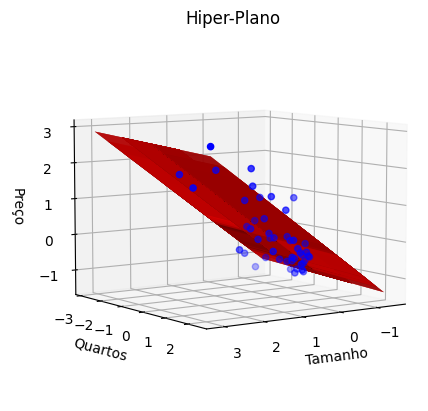

In [48]:
# Plotting Hiper-Plane generated by Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adjusting Plot angles
ax.view_init(elev=7, azim=55)

# Plotting real data and regression values
ax.scatter(x1, x2, y, label = 'Dados Reais', color = 'blue')

# Plotting Linear Regression Hiper-Plane
xx, yy = np.meshgrid(x1, x2)
zz = b0 + b1 * xx + b2 * yy
ax.plot_surface(xx, yy, zz, alpha = 0.5, label = 'regression', color = 'red')

# Axes Labels
ax.set_xlabel('Tamanho')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
ax.set_title('Hiper-Plano')

# Show the plot
plt.show()

Equação Normal

In [49]:
# Normal Equation

# Creating x0 list of values
x0 = np.ones(len(x1), dtype=int)

# Creating a DataFrame only with the features
d = {'x0':x0, 'x1':df_aux['Tamanho'], 'x2':df_aux['Quartos']}
dfx = pd.DataFrame(d)
dfx.head()

,x0,x1,x2
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [50]:
# Creating X matrix
X = dfx.to_numpy()
print(np.shape(X))
print(X)

(47, 3)
[[   1 2104    3]
 [   1 1600    3]
 [   1 2400    3]
 [   1 1416    2]
 [   1 3000    4]
 [   1 1985    4]
 [   1 1534    3]
 [   1 1427    3]
 [   1 1380    3]
 [   1 1494    3]
 [   1 1940    4]
 [   1 2000    3]
 [   1 1890    3]
 [   1 4478    5]
 [   1 1268    3]
 [   1 2300    4]
 [   1 1320    2]
 [   1 1236    3]
 [   1 2609    4]
 [   1 3031    4]
 [   1 1767    3]
 [   1 1888    2]
 [   1 1604    3]
 [   1 1962    4]
 [   1 3890    3]
 [   1 1100    3]
 [   1 1458    3]
 [   1 2526    3]
 [   1 2200    3]
 [   1 2637    3]
 [   1 1839    2]
 [   1 1000    1]
 [   1 2040    4]
 [   1 3137    3]
 [   1 1811    4]
 [   1 1437    3]
 [   1 1239    3]
 [   1 2132    4]
 [   1 4215    4]
 [   1 2162    4]
 [   1 1664    2]
 [   1 2238    3]
 [   1 2567    4]
 [   1 1200    3]
 [   1  852    2]
 [   1 1852    4]
 [   1 1203    3]]


In [51]:
# Calculating X Transpose
X_t = np.transpose(X)
print(np.shape(X_t))
print(X_t)

(3, 47)
[[   1    1    1    1    1    1    1    1    1    1    1    1    1    1
     1    1    1    1    1    1    1    1    1    1    1    1    1    1
     1    1    1    1    1    1    1    1    1    1    1    1    1    1
     1    1    1    1    1]
 [2104 1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478
  1268 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526
  2200 2637 1839 1000 2040 3137 1811 1437 1239 2132 4215 2162 1664 2238
  2567 1200  852 1852 1203]
 [   3    3    3    2    4    4    3    3    3    3    4    3    3    5
     3    4    2    3    4    4    3    2    3    4    3    3    3    3
     3    3    2    1    4    3    4    3    3    4    4    4    2    3
     4    3    2    4    3]]


In [52]:
# Calculating X_t * X
X_temp = np.matmul(X_t, X)
print(np.shape(X_temp))
print(X_temp)

(3, 3)
[[       47     94032       149]
 [    94032 217179406    313679]
 [      149    313679       499]]


In [53]:
# Calculating the inverse of X_temp
X_temp_inv = np.linalg.inv(X_temp)
print(np.shape(X_temp_inv))
print(X_temp_inv)

(3, 3)
[[ 3.99642990e-01 -7.36150728e-06 -1.14704720e-01]
 [-7.36150728e-06  5.01455797e-08 -2.93241497e-05]
 [-1.14704720e-01 -2.93241497e-05  5.46881227e-02]]


In [54]:
# Calculating X_temp_inv * X_t
X_final = np.dot(X_temp_inv, X_t)
print(np.shape(X_final))
print(X_final)

(3, 47)
[[ 4.00402187e-02  4.37504184e-02  3.78612126e-02  1.59809656e-01
  -8.12604117e-02 -7.37884818e-02  4.42362779e-02  4.50239591e-02
   4.53699500e-02  4.45307382e-02 -7.34572139e-02  4.08058155e-02
   4.16155813e-02 -2.06845439e-01  4.61944388e-02 -7.61073566e-02
   1.60516360e-01  4.64300070e-02 -7.83820623e-02 -8.14886184e-02
   4.25210467e-02  1.56335024e-01  4.37209724e-02 -7.36191671e-02
   2.68925667e-02  4.74311720e-02  4.47957524e-02  3.69336626e-02
   3.93335140e-02  3.61165353e-02  1.56695738e-01  2.77576762e-01
  -7.41933647e-02  3.24357817e-02 -7.25075795e-02  4.49503441e-02
   4.64079225e-02 -7.48706233e-02 -9.02046430e-02 -7.50914686e-02
   1.57984002e-01  3.90537767e-02 -7.80728790e-02  4.66950213e-02
   1.63961546e-01 -7.28094013e-02  4.66729368e-02]
 [ 1.01723432e-05 -1.51010289e-05  2.50154348e-05  4.99633414e-06
   2.57786329e-05 -2.51191304e-05 -1.84106372e-05 -2.37762142e-05
  -2.61330564e-05 -2.04164604e-05 -2.73756815e-05  4.95720296e-06
  -5.58810805e-07

In [57]:
# Adjusting y vector's dimension
d_temp = {'y':df_aux['Preco']}
dfy = pd.DataFrame(d_temp)
y_vector = dfy.to_numpy()
print(np.shape(y_vector))

(47, 1)


In [58]:
# Calculating teta vector
teta_vector = np.matmul(X_final, y_vector)
print(np.shape(teta_vector))
print(teta_vector)

(3, 1)
[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


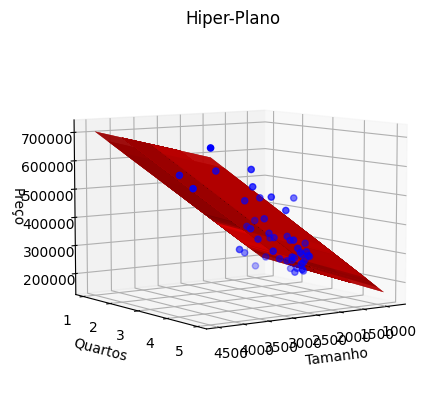

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adjusting Plot angles
ax.view_init(elev=7, azim=55)

# Plotting real data and regression values
ax.scatter(df_aux['Tamanho'], df_aux['Quartos'], df_aux['Preco'], label = 'Dados Reais', color = 'blue')

# Plotting Linear Regression Hiper-Plane
x3, y3 = np.meshgrid(df_aux['Tamanho'], df_aux['Quartos'])

# Calculating Linear Regression Result
z3 = teta_vector[0] + teta_vector[1] * x3 + teta_vector[2] * y3
ax.plot_surface(x3, y3, z3, alpha = 0.5, label = 'regression', color = 'red')

# Axes Labels
ax.set_xlabel('Tamanho')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço')
ax.set_title('Hiper-Plano')

# Show the plot
plt.show()

Comparação do custo final entre os métodos

In [60]:
# Utilizando os valores finas encontrados para b0, b1 e b2 para calcular o erro final do método Equação Normal
custo_final_eq_normal = lr.cost(teta_vector[0], teta_vector[1], teta_vector[2], df_aux['Tamanho'], df_aux['Quartos'], df_aux['Preco'])
print('Equação Normal Custo Final: ', custo_final_eq_normal)

# Utilizando os valores finas encontrados para b0, b1 e b2 para calcular o erro final do método Gradiente Descendente
custo_final_gradiente = lr.cost(b0, b1, b2, x1, x2, y)
print('Gradiente Descendente Custo Final: ', custo_final_gradiente)

Equação Normal Custo Final:  [2.04328005e+09]
Gradiente Descendente Custo Final:  0.13070322536187892


Para concluir, podemos perceber que ao aplicarmos o erro quadrático médio em cada uma das previsões, tanto a previsão utilizando o Gradiente Descendente
quanto a previsão utilizando a Equação Normal, é possível observar uma pequena diferença entre os erros finais de cada previsão, indicando que para esse
modelo em específico o modelo que utiliza o Gradiente Descendente se saiu melhor pois conseguiu diminuir mais o erro.